In [26]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#df =  pd.read_csv("data.csv",encoding='latin1')

In [16]:
#Searching for missing values
df.columns[df.isnull().any()]

Index(['Description', 'CustomerID'], dtype='object')

In [15]:
data_missing= df.filter(['Description','CustomerID'],axis=1)
data_missing

,Description,CustomerID
0,WHITE HANGING HEART T-LIGHT HOLDER,17850.0
1,WHITE METAL LANTERN,17850.0
2,CREAM CUPID HEARTS COAT HANGER,17850.0
3,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0
4,RED WOOLLY HOTTIE WHITE HEART.,17850.0
...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12680.0
541905,CHILDREN'S APRON DOLLY GIRL,12680.0
541906,CHILDRENS CUTLERY DOLLY GIRL,12680.0
541907,CHILDRENS CUTLERY CIRCUS PARADE,12680.0


In [20]:
#Missing values in %

summary_table = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    '% Missing Values': (df.isnull().sum() / len(df)) * 100,
    'Data Type': df.dtypes
})

summary_table = summary_table.sort_values(by='% Missing Values', ascending=False)
summary_table

,Missing Values,% Missing Values,Data Type
CustomerID,135080,24.926694,float64
Description,1454,0.268311,object
InvoiceNo,0,0.000000,object
StockCode,0,0.000000,object
Quantity,0,0.000000,int64
InvoiceDate,0,0.000000,object
UnitPrice,0,0.000000,float64
Country,0,0.000000,object


In [22]:
#convert datas
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [23]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [37]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

In [39]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9


In [ ]:
#Number of transactions by year
df_year=df.groupby(['Year'], as_index=False)['InvoiceNo'].count()
plt.figure(figsize=(15,5))
sns.barplot(x=df_year.Month,y=df_year.InvoiceNo)
plt.ylabel("Number of Transactions")
plt.xlabel("Number of Transactions by Year")

Text(0.5, 0, 'Number of Transactions by Month')

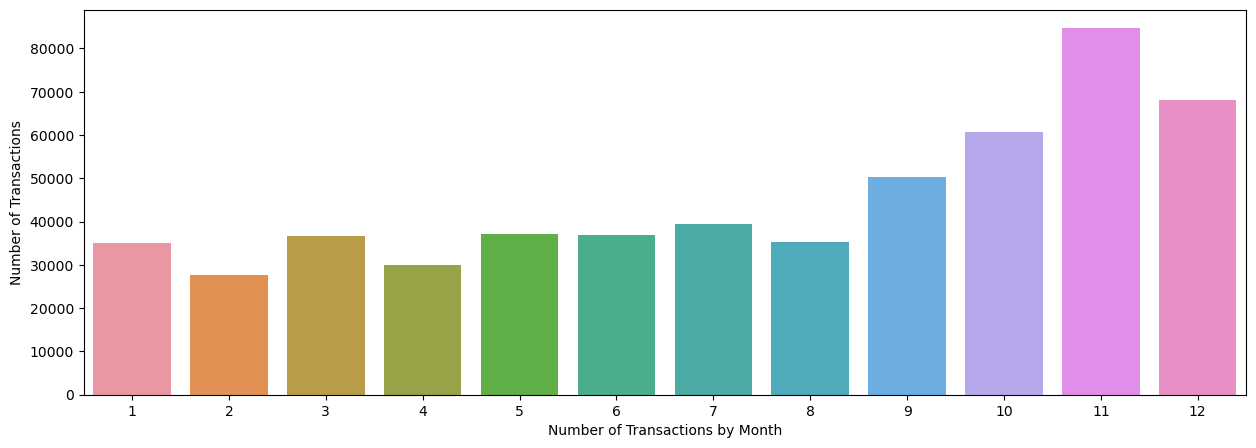

In [40]:
#Number of transactions by month
df_month=df.groupby(['Month'], as_index=False)['InvoiceNo'].count()
plt.figure(figsize=(15,5))
sns.barplot(x=df_month.Month,y=df_month.InvoiceNo)
plt.ylabel("Number of Transactions")
plt.xlabel("Number of Transactions by Month")

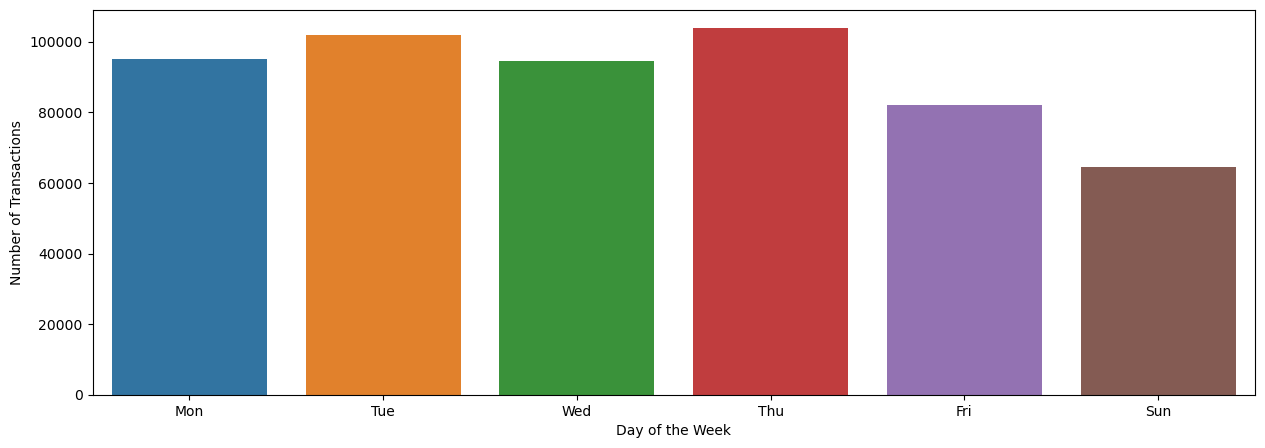

In [42]:
#Number of transcations by day
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

df_day = df.groupby("DayOfWeek", as_index=False)['InvoiceNo'].count()
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_day['DayOfWeek'] = df_day['DayOfWeek'].map(dict(zip(range(7), day_names)))
plt.figure(figsize=(15, 5))
sns.barplot(x='DayOfWeek', y='InvoiceNo', data=df_day)
plt.ylabel("Number of Transactions")
plt.xlabel("Day of the Week")
plt.show()

Text(0.5, 0, 'Number of Transactions by Country')

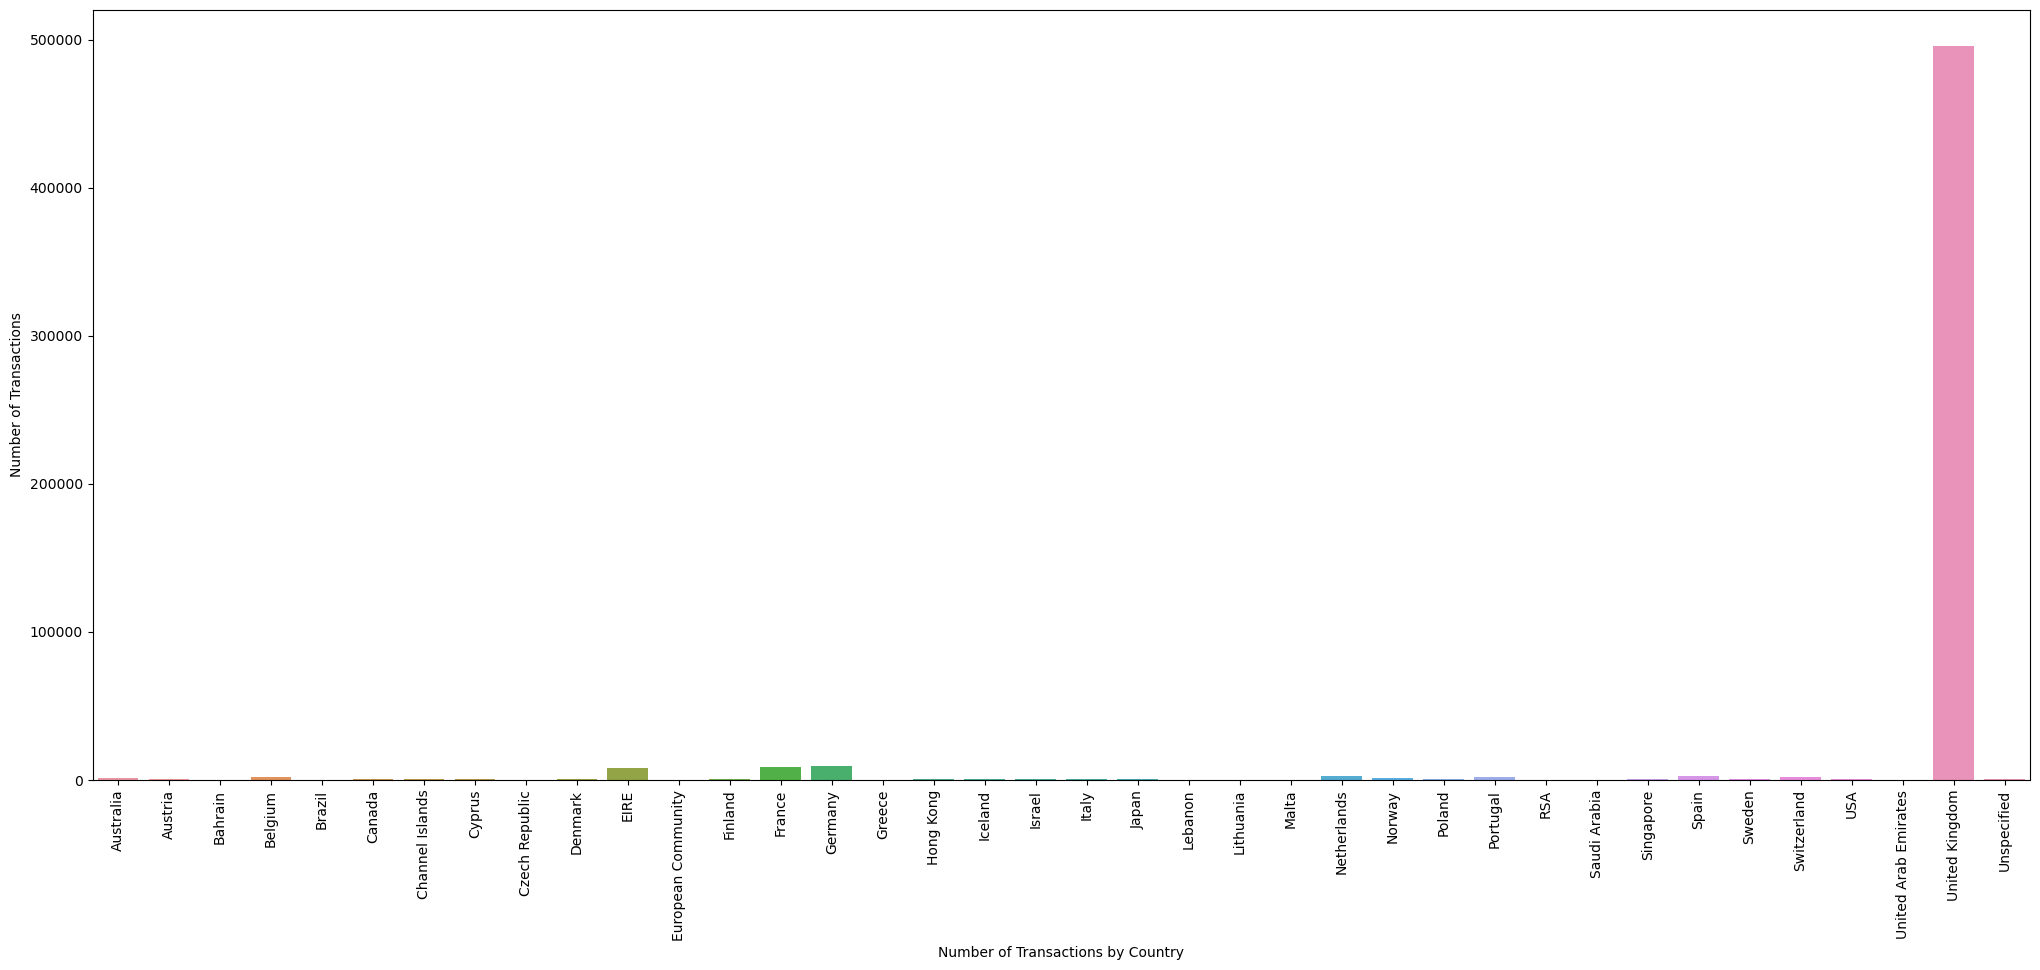

In [46]:
#Number of transaction by country
df_country=df.groupby(['Country'], as_index=False)['InvoiceNo'].count()
plt.figure(figsize=(25,10))
sns.barplot(x=df_country.Country,y=df_country.InvoiceNo)
plt.ylabel("Number of Transactions")
plt.xticks(rotation=90)
plt.xlabel("Number of Transactions by Country")

C:\Users\C38371\AppData\Local\Temp\ipykernel_17800\1749507147.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_temp.corr(), annot=True,cmap="coolwarm")


<Axes: >

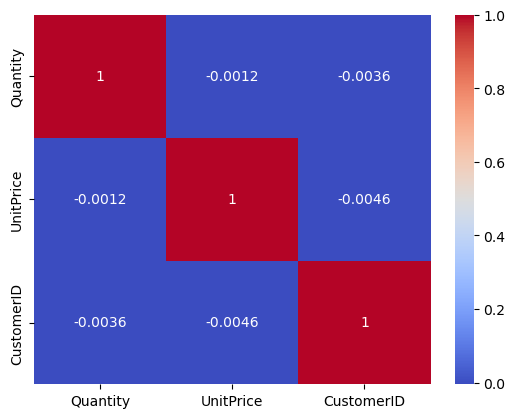

In [53]:
#df_temp=df.drop(['Year','Month','Day','DayOfWeek'],axis=1)
sns.heatmap(df_temp.corr(), annot=True,cmap="coolwarm")

In [54]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,4
